# Actividad 3.3

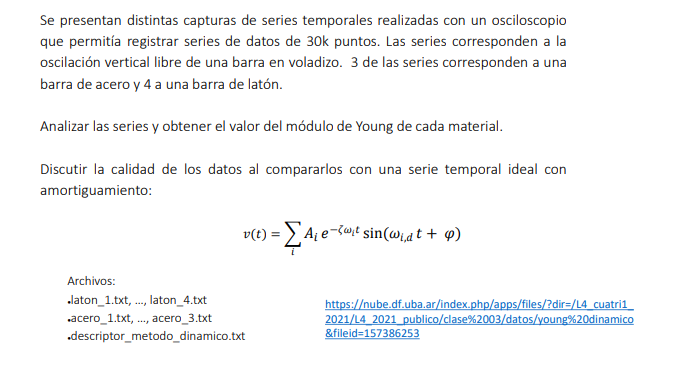

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
import matplotlib
import pint
from scipy import signal

un = pint.UnitRegistry()
Q = un.Quantity

L_l = 255 * un.millimeter #mm logitud
L_a = 240 * un.millimeter#mm longitud

d_l = 4.6 * un.millimeter#mm diametro
d_a = 4.0 * un.millimeter#mm diametro

er_L = 2 * un.millimeter  #mm
er_d = 0.2 * un.millimeter#mm

r_a = 7850 * un.kilogram/(un.meter**3) #km/m^3 densidad
r_l = 8730 * un.kilogram/(un.meter**3)#km/m^3 densidad

E_l = 110e9 * un.pascal# pa
E_a = 200e9 * un.pascal# pa
#A = area transversal entiendo yo $pi*r^2$

bl = [1.875104, 4.694091, 7.854757, 10.99554]  #beta *L

archivos_laton = []
archivos_acero = []
for i in range(3):
    archivos_acero.append(np.loadtxt('acero_'+ str(i+1) +'.txt', skiprows = 4))
    archivos_laton.append(np.loadtxt('laton_'+ str(i+1) +'.txt', skiprows=  4))
archivos_laton.append(np.loadtxt('laton_4.txt', skiprows=  4))

## Calculo de las frecuencias 'teoricas'

In [2]:
#E_a = 245e9*un.pascal
Izz_l = np.pi*((d_l/2)**4)/4
Izz_a = np.pi*((d_a/2)**4)/4
B_l = np.pi*((d_l/2)**2)*r_l #El factor q va dividiendo en w
B_a = np.pi*((d_a/2)**2)*r_a #El factor q va dividiendo en w

#son las omwgas teoricas
w_l = []
w_a = [] 
for i in bl:#ver so bl es igual para ambos o no
    w_l.append((np.sqrt(E_l*Izz_l/B_l)*(i/L_l)**2).to(1/un.second)) 
    w_a.append((np.sqrt(E_a*Izz_a/B_a)*(i/L_a)**2).to(1/un.second))
w_a[0]/(2*np.pi)

49.03752450962432 <Unit('1 / second')>

In [3]:
er_w_0_L = 2*bl[0]**2 / L_a**3 *er_L* np.sqrt(E_a *((d_l/2)**2)/(4*r_a))
er_w_0_r = (bl[0]/L_a)**2 * np.sqrt(E_a/(4*r_a))*(er_d/2)

er_w_0 = np.sqrt(er_w_0_L**2 + er_w_0_r**2)
er_w_0.to(1/un.second)/(2*np.pi)

2.625848911228275 <Unit('1 / second')>

In [26]:
er_w_0_L.to(1/un.second)

5.9054771920704985 <Unit('1 / second')>

### FFT y gráficos del Latón

<IPython.core.display.Javascript object>


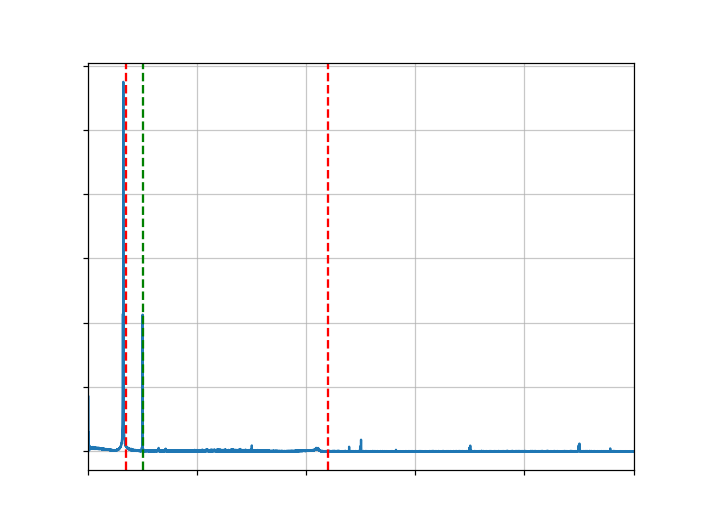

<ipython-input-6-61537c81a125>:41: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-61537c81a125>:42: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-61537c81a125>:43: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-61537c81a125>:44: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')


<IPython.core.display.Javascript object>


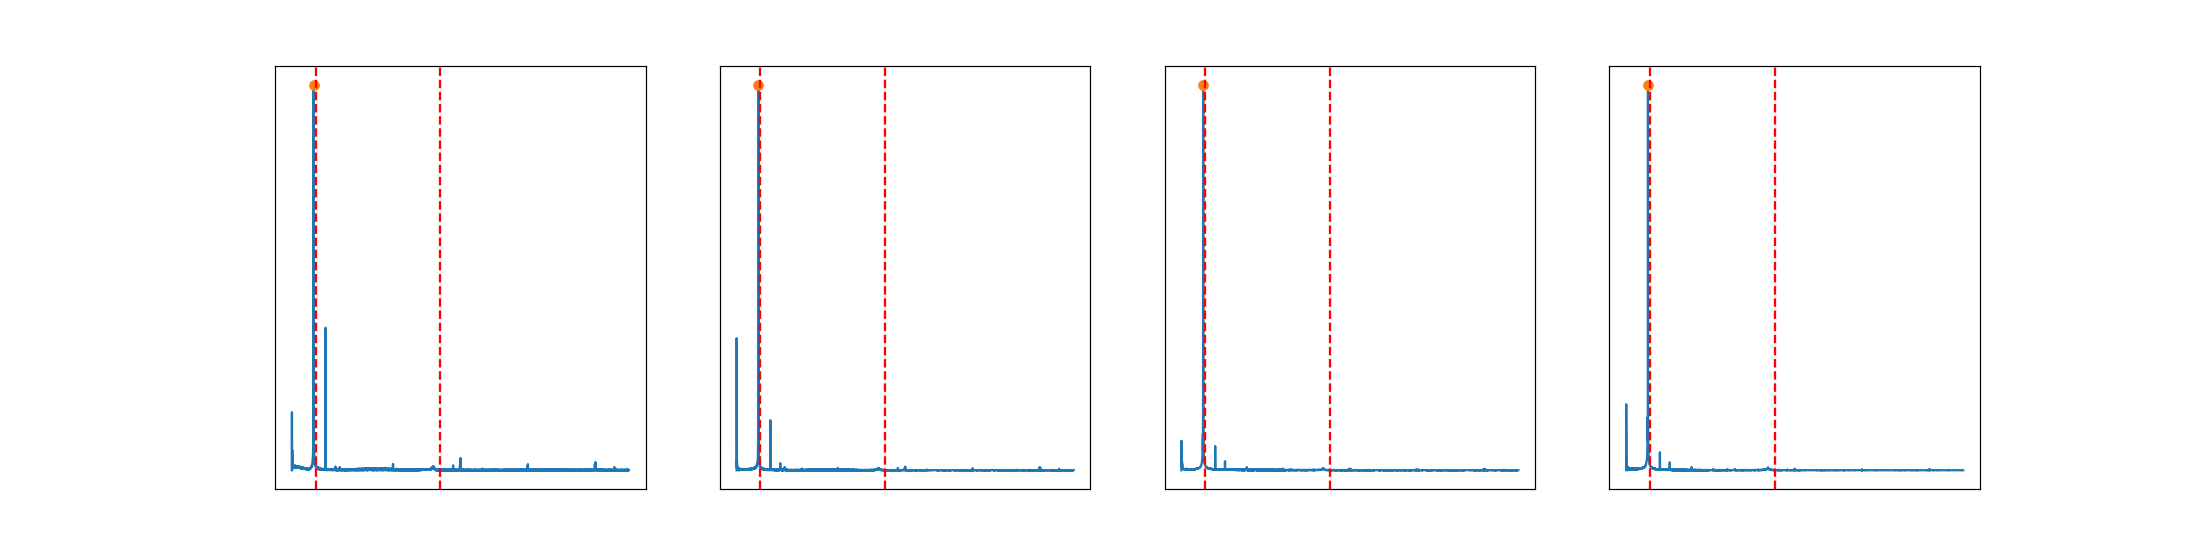

<ipython-input-6-61537c81a125>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-61537c81a125>:55: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-61537c81a125>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-61537c81a125>:55: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-6-61537c81a125>:54: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', 

In [6]:
%matplotlib nbagg
t = archivos_laton[0][:,0]
t_u = (Q, 'second')

laton = []
acero = []
for i in range(len(archivos_laton)):
    laton.append(archivos_laton[i][:,1])
    if i<3:
        acero.append(archivos_acero[i][:,1])
        
fft_l = []
fft_a = []
for i in range(len(laton)):
    fft_l.append(np.fft.fft(laton[i]-np.mean(laton[i])))
    if i<3:
        fft_a.append(np.fft.fft(acero[i]-np.mean(acero[i])))

fft_l2 = []
fft_a2 = []
picos_l = []
picos_a = []
for i in range(len(fft_l)):
    fft_l2.append(2/len(t) *np.abs(fft_l[i][:len(t)//2]))
    picos_l.append(signal.find_peaks(np.abs(fft_l2[i])))
    if i<3:
        fft_a2.append(2/len(t) *np.abs(fft_a[i][:len(t)//2]))
        picos_a.append(signal.find_peaks(np.abs(fft_a2[i])))
        
t_m = max(t)/len(t)
frec = np.linspace(0, 1/(t_m*2), int(len(t)/2))
frec_u = Q(frec, '1/second')

#plt.plot(t[1000:10000],laton[0][1000:10000])
plt.figure()
plt.plot(frec, np.abs(fft_l2[0]))
plt.xlim([0,500])
plt.grid(True, alpha=0.7)
plt.xticks(color= 'w')
plt.yticks(color='w')
plt.axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[2])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(np.array(w_l[3])/(2*np.pi), linestyle = 'dashed', color = 'red')
plt.axvline(50,linestyle = 'dashed', color='green')

with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,4, figsize= (20,5))
    #ax[i].set_xticks(color= 'w')
    #ax[i].set_yticks(color='w')
    for i in range(len(fft_l2)):
        ax[i].plot(frec, np.abs(fft_l2[i]))
        ax[i].plot(frec[np.argmax(fft_l2[i])] , max(fft_l2[i]), 'o')
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
        #ax[i].set_xlabel(color ='w')
        #ax[i].tick_params(color='w')
        #ax[i].set_xticks(color= 'w')
        #ax[i].set_yticks(color='w')


### Gráficos del acero

<ipython-input-4-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-c32019a4fce9>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-c32019a4fce9>:6: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
<ipython-input-4-c32019a4fce9>:5: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color

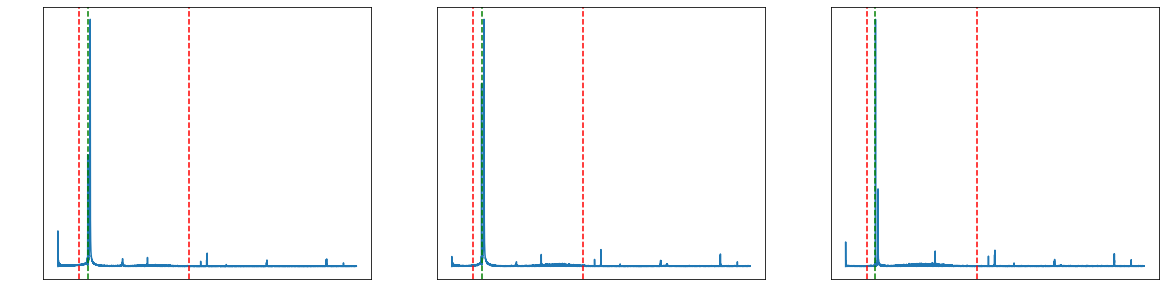

In [4]:
with plt.rc_context({'xtick.color':'w', 'ytick.color':'w'}):
    fig, ax = plt.subplots(1,3, figsize= (20,5))
    for i in range(len(fft_a2)):
        ax[i].plot(frec, np.abs(fft_a2[i]))
        ax[i].axvline(np.array(w_l[0])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(np.array(w_l[1])/(2*np.pi), linestyle = 'dashed', color = 'red')
        ax[i].axvline(50,linestyle = 'dashed', color='green')


# Calculo del módulo de Young

In [5]:
### sin el zeda
w_l_exp = []
w_a_exp = []#w_a_exp[2] modificar
for i in range(len(fft_l2)):
    a = np.argmax(fft_l2[i])
    w_l_exp.append(frec[a])
    if i<3:
        b = np.argmax(fft_a2[i])
        w_a_exp.append(frec[b])
        

E_exp_l = (B_l/Izz_l) * (((np.mean(w_l_exp)*2*np.pi*(1/un.second))*(L_l/bl[0])**2)**2)
#E_exp_a = (B_a/Izz_l) * (((np.mean(w_a_exp)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2) #acero geral
E_exp_a = (B_a/Izz_a) * (((((w_a_exp[0]+w_a_exp[1])/2)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2) #acero solo con los primeros dos w

E__ad = (B_a/Izz_a) * (((((w_a[0])))*(L_a/bl[0])**2)**2) #acero solo con los primeros dos w
E_exp_ll = (B_l/Izz_l) * (((w_l[0])*(L_l/bl[0])**2)**2)


#E_exp_l.to(un.pascal)/1e9
#_exp_a.to(un.pascal)/1e9
E_exp_l.to(un.pascal)/1e9, E_exp_a.to(un.pascal)/1e9
#E_exp_ll.to(un.pascal)/1e9, E_exp_l.to(un.pascal)/1e9

(93.29814558931335 <Unit('pascal')>, 244.67656622028557 <Unit('pascal')>)

In [6]:
from scipy.signal import find_peaks

t_2 = archivos_acero[0][:,0][0:10000]
a_2 = []
for i in range(3):
    a_2.append(archivos_acero[i][:,1][0:10000])

t_step = max(t_2)/len(t_2)
frec2 = np.linspace(0, 1/(t_step*2), int(len(t_2)/2))
#frec2 = np.linspace(1/(t_min_2*2), 1/(t_max_2*2), int(len(t_2)/2))
fft_a2_1 = []
fft_a2_2 = []
w_a_exp_2 = []
for i in range(3):
    fft_a2_1.append(np.fft.fft(a_2[i]-np.mean(a_2[i])))
    fft_a2_2.append(2/len(t_2) *np.abs(fft_a2_1[i][:len(t_2)//2]))
    a= np.argmax(fft_a2_2[i])
    w_a_exp_2.append(frec2[a])
    
w_a_exp_2
#ma = np.argmax(fft_a2_2)
#frec2[ma]
#plt.plot(frec2, np.abs(fft_a2_2[0]))
#plt.plot(frec2[ma], max(fft_a2_2[0]), 'ro')
#a, _ = find_peaks(a_2[0], height =2.2)
#cte = np.linspace(2.3, 2.4, len(a[0]))
#plt.plot(archivos_acero[0][:,0][0:10000],archivos_acero[0][:,1][0:10000])
#plt.plot(a, a_2[0][a],'.')
#plt.xlim([4,4.5])
E_exp = (B_a/Izz_l) * (((np.mean(w_a_exp_2)*2*np.pi*(1/un.second))*(L_a/bl[0])**2)**2)
E_exp.to(un.pascal)/1e9
#fft_a2_2[0][a[0]]
#max(np.abs(fft_a2_2[0]))

139.9505961192469 <Unit('pascal')>

### Sacando la frecuencia de linea y calculo del $\zeta$

48.004800373360005 51.971863737547395


C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


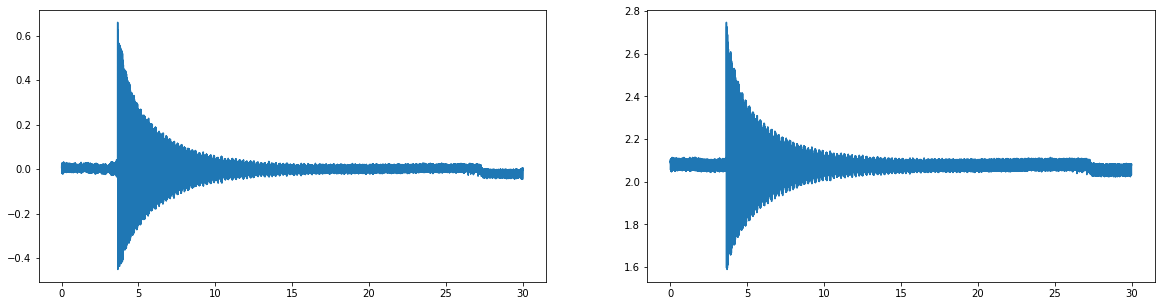

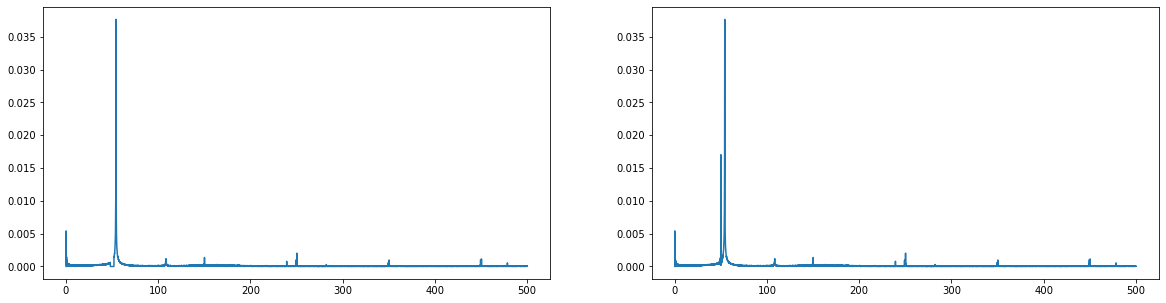

In [7]:
frec_red= []
for i in range(len(frec)):
    if frec[i]>48 and frec[i]<52:
        frec_red.append(i)
        
frec_red
print(frec[1440], frec[1559])
for i in range(1559-1440):
    fft_a[0][i+1440] = 0

fft_2 = 2/len(t) *np.abs(fft_a[0][:len(t)//2])
fig, ax = plt.subplots(1,2, figsize =(20,5))

ax[0].plot(t,(np.fft.ifft(fft_a[0])))
ax[1].plot(t, archivos_acero[0][:,1])

fig, ax  = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(frec,fft_2)
ax[1].plot(frec,fft_a2[0])

-0.0020601492494870055 -0.001925225984113297


C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


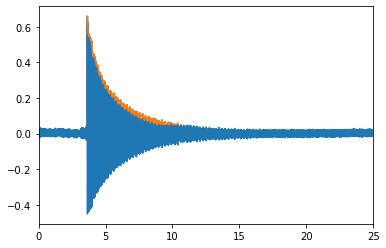

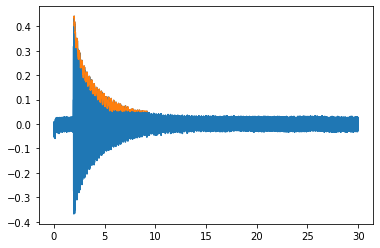

In [8]:
from scipy.signal import find_peaks
a0 = np.fft.ifft(fft_a[0])

picos,_ = find_peaks(a0, height = 0.05)
plt.plot(t, a0)
plt.plot(t[picos], a0[picos])
plt.xlim([0, 25])
pico_S = np.abs(a0[picos])
delta = np.diff(np.log(pico_S))
z =delta/(np.sqrt(4*np.pi + (delta**2)))

z_a0 = np.mean(z)

V = []
zs = []
#for i in range(3):
 #   V.append(np.fft.ifft(fft_a[i]))
  #  picos,_ = find_peaks(V[i], height = 0.05)
   # pico_S = np.abs(V[i][picos])
    #delta = np.diff(np.log(pico_S))
    #z =delta/(np.sqrt(4*np.pi + (delta**2)))
    #zs.append(z)
    #plt.figure()
    #plt.plot(t, V[i])
    #plt.plot(t[picos], V[i][picos])
#np.diff(np.log(pico_S))
#V[0][picos]
a1 = np.fft.ifft(fft_a[1])
picos,_ = find_peaks(a1, height = 0.05)
pico_S = np.abs(a1[picos])
delta = np.diff(np.log(pico_S))
z =delta/(np.sqrt(4*np.pi + (delta**2)))

plt.figure()
plt.plot(t,a1)
plt.plot(t[picos[3:]], a1[picos[3:]])
z_a1 = np.mean(z[3:])

print(z_a0, z_a1)

[54.23875708851161, 54.23875708851161, 50.03833705584262] diferidas 
 54.23864198791817 54.23865657057506


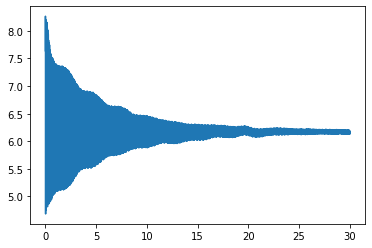

In [9]:
w_a_exp
wid_a0 = w_a_exp[0]*np.sqrt(1-z_a0**2)
wid_a1 = w_a_exp[1]*np.sqrt(1-z_a1**2)
print(w_a_exp, 'diferidas \n', wid_a0, wid_a1)

plt.figure()
plt.plot(t, archivos_laton[2][:,1])

# Calculo del error del módulo de Young

In [104]:
# w_l = np.mean(w_l_exp) *(1/un.second)

# err_lon = r_l*np.pi*((d_l/2)**2)/Izz_l * (w_l)**2 * 4* (L_l/bl[0])**3 *er_L
# err_rad = (w_l*(L_l/bl[0])**2)**2 *((r_l*2*np.pi*(d_l/2)*(er_d/2)/Izz_l) + (r_l*16*(er_d/2)/(d_l/2)**3))
# err_w = r_l*np.pi*((d_l/2)**2)/Izz_l *(L_l/bl[0])**4 *2*w_l * (2*(1/un.second)*2*np.pi)

# err_E_L = np.sqrt(err_lon**2 + err_rad**2 + err_w**2)
# err_E_L.to(un.pascal)/1e9

#err_w.to(un.pascal)/1e9

1.9415776562085456 <Unit('pascal')>

In [105]:
# w_a = (w_a_exp[0]+w_a_exp[1])/2 *(1/un.second)

# err_lon_a = r_a*np.pi*((d_a/2)**2)/Izz_a * (w_a)**2 * 4* (L_a/bl[0])**3 *er_L
# err_rad_a = (w_a*(L_a/bl[0])**2)**2 *((r_a*2*np.pi*(d_a/2)*(er_d/2)/Izz_a) + (r_a*16*(er_d/2)/(d_a/2)**3))
# err_w_a = r_a*np.pi*((d_a/2)**2)/Izz_a *(L_a/bl[0])**4 *2*w_a* (2*(1/un.second)*2*np.pi)

# err_E_a = np.sqrt(err_lon_a**2 + err_rad_a**2 + err_w_a**2)
# err_E_a.to(un.pascal)/1e9


3.4430641896181537 <Unit('pascal')>

In [10]:
w_l = np.mean(w_l_exp) *(1/un.second)
er_f = 1/len(frec) *(1/un.second)
#er_f =  0.04684060143332241 /un.second
err_lon = r_l*np.pi*((d_l/2)**2)/Izz_l * (w_l)**2 * 4* (L_l**3)/((bl[0])**4) *er_L

er_Lon =(r_l*16*(L_l**3)* er_L * (w_l*2*np.pi)**2)/((d_l/2)**2 * bl[0]**4)
er_ra = (L_l/bl[0])**4 *(w_l*2*np.pi)**2 *r_l * (er_d/2) * (8/(d_l/2)**3 - 16/(d_l/2)**3)
er_w = ((L_l/bl[0])**4  * r_l * 8 * (w_l*2*np.pi) *(er_f*2*np.pi))/((d_l/2)**2)

err_E_l = np.sqrt(er_Lon**2 + er_ra**2 + er_w**2)

err_E_l.to(un.pascal)/1e9

8.624742948543272 <Unit('pascal')>

In [11]:
er_f = 1/len(frec) *(1/un.second)
w_a = (w_a_exp[0]+w_a_exp[1])/2 *(1/un.second)

#er_f =  0.04684060143332241 /un.second
err_lon = r_a*np.pi*((d_a/2)**2)/Izz_a * (w_a)**2 * 4* (L_a**3)/((bl[0])**4) *er_L

er_Lon =(r_a*16*(L_a**3)* er_L * (w_a*2*np.pi)**2)/((d_a/2)**2 * bl[0]**4)
er_ra = (L_a/bl[0])**4 *(w_a*2*np.pi)**2 *r_a * (er_d/2) * (8/(d_a/2)**3 - 16/(d_a/2)**3)
er_w = ((L_a/bl[0])**4  * r_a * 8 * (w_a*2*np.pi) *(er_f*2*np.pi))/((d_a/2)**2)

err_E_a = np.sqrt(er_Lon**2 + er_ra**2 + er_w**2)

err_E_a.to(un.pascal)/1e9

25.79117465118421 <Unit('pascal')>